# *Netflix*

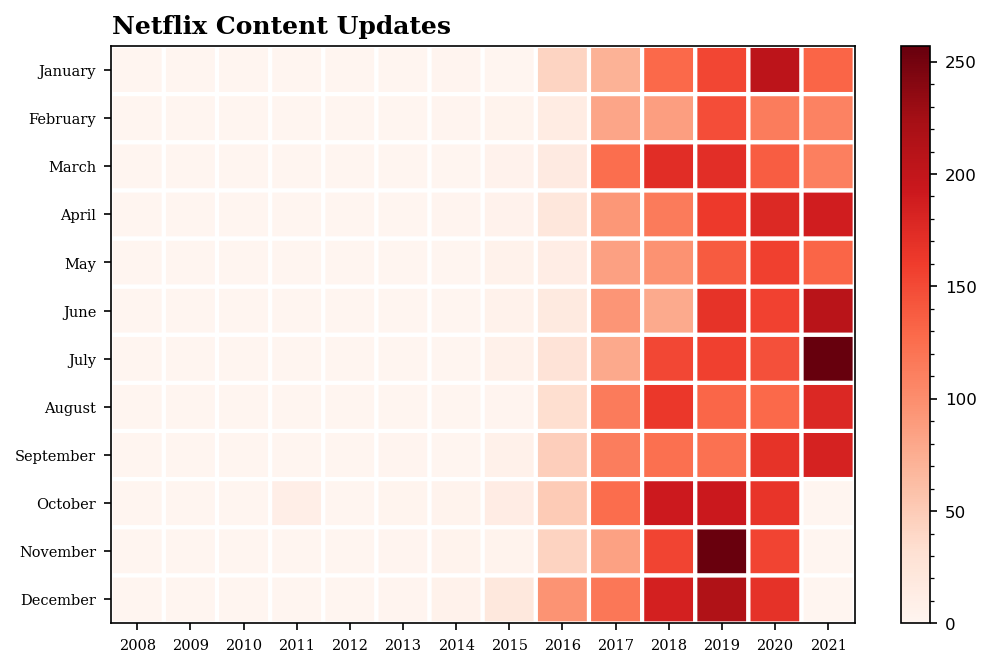

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,4.0,4.0,44.0,85.0,154.0,255.0,154.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,51.0,126.0,191.0,193.0,167.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

file_path = 'C:\\Users\\vlad-\Desktop\\netflix_titles.csv'
df = pd.read_csv(file_path)
global df
dates = df[['date_added']].dropna()
dates['year'] = dates['date_added'].apply(lambda x: x.split(', ')[-1])
dates['month'] = dates['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = dates.groupby('year')['month'].value_counts().unstack().fillna(0)[months_order].T


plt.figure(figsize=(8, 5), dpi= 150)
plt.pcolor(df1, cmap='Reds', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Content Updates', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 2.0))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()
df1

In [ ]:
В большей степени выпускать контент платформа начала с 2016 года
Также по частоте выпуска контента нельзя сказать, что есть какая-то явная сезонность

In [75]:
import plotly.express as px
df1 = df['type'].value_counts()
fig = px.bar(df1, 
             x=df1.index, 
             y= df1.values, 
             template= 'plotly_dark', 
             width=450, 
             height=400,  
             labels={'x': '', 'y': ''},  
             color=df1.index,
             title = 'Content types'
            )
fig.update_layout(font_family="San Serif",
                  titlefont={'size': 32},
                  bargap=0.3
                 )
fig.show()
df1

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

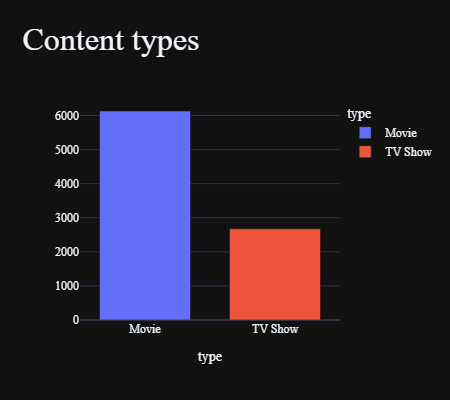

Соотношение количества фильмов на платформе к количеству сериалов порядка 2-2.5 к 1, проверим изменилась ли тенденция на отрезке последних лет

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\vlad-\Desktop\\netflix_titles.csv'
df = pd.read_csv(file_path)
df2 = df[['date_added']].dropna()
df2['date_added'] = df2['date_added'].apply(lambda x: x.split(', ')[-1])
df2['date_added'] = df2['date_added'].astype(int)
df['date_added'] = df2['date_added']
df1 = df[df['date_added'] >= 2019]
df1 = df1['type'].value_counts()
fig = px.bar(df1, 
             x=df1.index, 
             y= df1.values, 
             template= 'plotly_dark', 
             width=450, 
             height=400,  
             labels={'x': '', 'y': ''},  
             color=df1.index,
             title='Content types since 2019'
            )
fig.update_layout(font_family="San Serif",
                  titlefont={'size': 32},
                  bargap=0.3
                 )
fig.show()
df1

type
Movie      3701
TV Show    1692
Name: count, dtype: int64

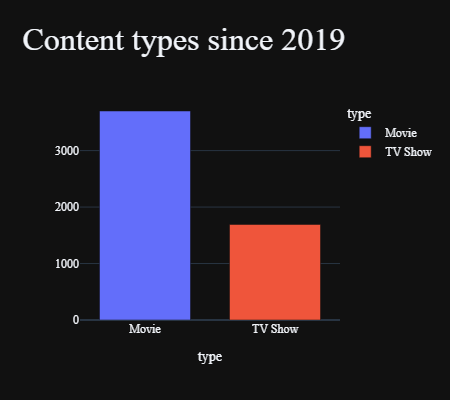

Примерно такое же соотношение сохраняется, что говорит о том, что полнометражные проекты доминируют над многосерийными

In [91]:
import plotly.express as px
import pandas as pd

# Группируем данные
df1 = df.groupby('director')['title'].count().sort_values(ascending=False)[:10]

# Создаем график
fig = px.bar(df1, 
             x=df1.values, 
             y=df1.index, 
             orientation='h',  
             template='plotly_dark',  
             labels={'x': '', 'y': 'Director'},  
             title='Directors with most projects',
             color=df1.index
            )
fig.update_layout(titlefont={'size': 32})

fig.show()
df1[:10]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: title, dtype: int64

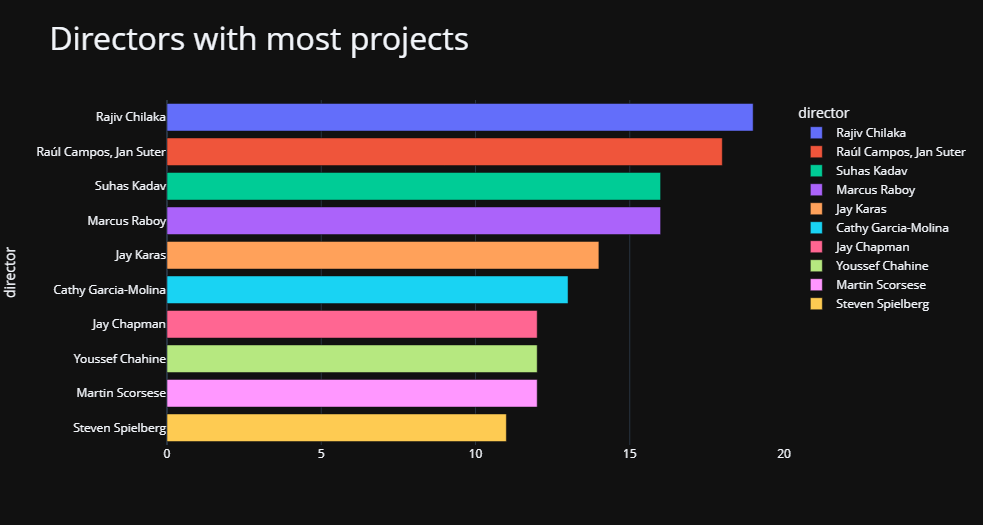

Netflix пополняет ростер своих проектов во многом благодаря независимым, непопулярным режиссерам, которые преобладают в топ-10 над большими именами (Мартин Скорсезе и Стивен Спилберг)

In [105]:
import plotly.express as px
import pandas as pd

# Группируем данные
df1 = df.groupby('country')['title'].count().sort_values(ascending=False)[:10]

# Создаем график
fig = px.bar(df1, 
             x=df1.values, 
             y=df1.index, 
             orientation='h', 
             template='plotly_dark',  
             labels={'x': '', 'y': ''},  
             title='Countries with most projects'  # Заголовок графика
            )

fig.update_layout(yaxis_autorange='reversed',
                 titlefont={'size': 32})

fig.update_yaxes(tickfont=dict(size=16))

fig.show()


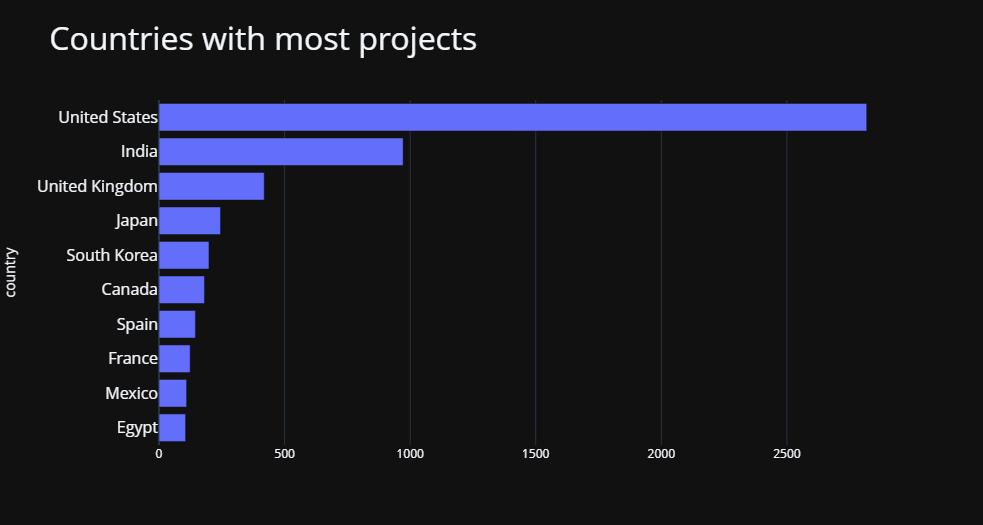

In [ ]:
Ожидаемо подавляющее большинство проектов родом из США
Но также выделяется количество индийского и великобританского производства

In [112]:
df1 = df.groupby('release_year')['title'].count()
fig = px.line(x=df1.index, y=df1.values, 
              template='plotly_dark',  
              labels={'x': '', 'y': ''},
              title='Release year of projects', 
              width=800, height=500 
             )

fig.update_layout(xaxis=dict(range=[2008, 2021]),
                  titlefont={'size': 32}
                 )

fig.show()
df1

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

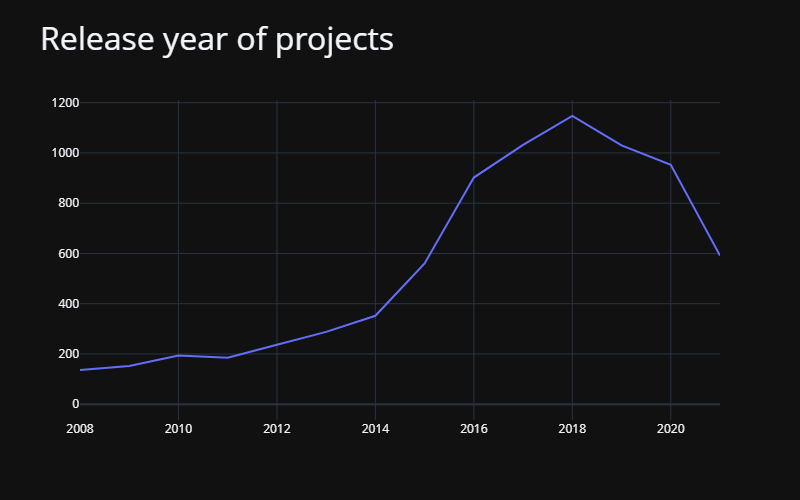

In [ ]:
В основном на платформе проекты близкие по году выпуска к пиковым годам деятельности Netflix
Тем не менее компания предоставляет для просмотра проекты более отдаленных лет 

In [114]:
file_path = 'C:\\Users\\vlad-\Desktop\\netflix_titles.csv'
df = pd.read_csv(file_path)
df2 = df[['date_added']].dropna()
df2['date_added'] = df2['date_added'].apply(lambda x: int(x.split(', ')[-1]))
df['date_added'] = df2['date_added']
df1 = df.groupby('date_added')['title'].count()

fig = px.line(x=df1.index, y=df1.values, 
              template='plotly_dark',  
              labels={'x': '', 'y': ''},  
              title='Addition years',  
              width=800, height=500 
             )

fig.update_layout(titlefont={'size': 32}
                 )
fig.show()
df1

date_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: title, dtype: int64

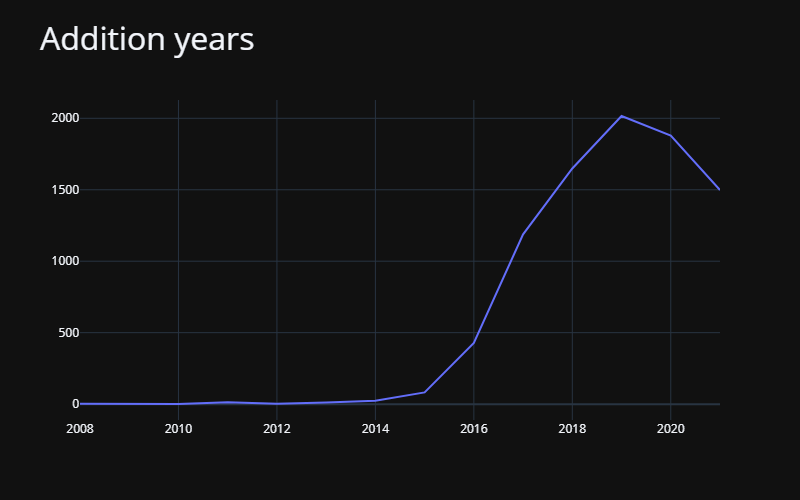

In [ ]:
По графику более отчетливо виден прорывной для платформы 2016 год, который задал новую динамику количества добавляемого контента
Пик пришелся на 2019 год, в который было добавлено 2016 проектов